In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from functools import partial

# Load MNIST data

In [108]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [109]:
X_train_full.shape[0], X_test.shape[0]

(60000, 10000)

### There are 60k training instances & 10k test instances.

In [110]:
X_train_full[0].min(), X_train_full[0].max() 

(0, 255)

### The individual pixel values range from 0 to 255; we'll want to scale these to between 0 & 1.

# Create validation set & scale pixel values

In [111]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

In [112]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [113]:
X_test = X_test/255.0

In [114]:
y_valid

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

### Labels are simple integer values.

In [115]:
len(np.unique(y_valid))

10

In [116]:
y_train = y_train*1.0
y_valid = y_valid*1.0
y_test = y_test*1.0 # y values need to be floats

We now have the following datasets:

> X_train, y_train
    
> X_valid, y_valid
    
> X_test, y_test

# Simple dense model

In [117]:
# model = keras.models.Sequential(
#     [
#         keras.layers.Flatten(input_shape=[28, 28]),
#         keras.layers.Dense(300, activation='relu'),
#         keras.layers.Dense(300, activation='relu'),
#         keras.layers.Dense(10, activation='softmax'),
#     ]
# ) # standard, manual way of building a model

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# for i in range(2):
#     model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax')) # building a model with a for loop

> ### The cell above contains two ways of defining layers and adding them to a model, the standard manual way and one with a for loop. Below I implement a third way using 'partial'.

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6079 - accuracy: 0.8474 - val_loss: 0.3052 - val_accuracy: 0.9154
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2899 - accuracy: 0.9178 - val_loss: 0.2461 - val_accuracy: 0.9318
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2392 - accuracy: 0.9314 - val_loss: 0.2086 - val_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2048 - accuracy: 0.9415 - val_loss: 0.1844 - val_accuracy: 0.9478
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1793 - accuracy: 0.9490 - val_loss: 0.1634 - val_accuracy: 0.9540
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1589 - accuracy: 0.9544 - val_loss: 0.1503 - val_accuracy: 0.9582
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1431 - accuracy: 0.9589 - val_loss: 0.1365 - val_accuracy:

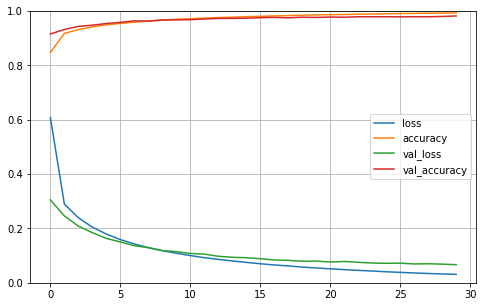

In [118]:
# define default attributes of a layer & call it during model building
simple_dense = partial(keras.layers.Dense,
                      activation='relu') 

# initialize the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    simple_dense(300),
    simple_dense(300),
    simple_dense(10, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # loss when labels are integers
    optimizer='sgd',
    metrics=['accuracy']
)

# implement early stopping to reduce overfitting
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

# capture the model's performance during training
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb]
)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [119]:
model.evaluate(X_test, y_test);

313/313 [==============================] - 0s 860us/step - loss: 0.0700 - accuracy: 0.9776


# "Default" dense
> ### In Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow Géron describes a default configuration for models featuring a simple stack of dense layers. Here we'll adhere as closely to that configuration as possible.

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4716 - accuracy: 0.8699 - val_loss: 0.2996 - val_accuracy: 0.9174
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3022 - accuracy: 0.9132 - val_loss: 0.2645 - val_accuracy: 0.9238
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2718 - accuracy: 0.9225 - val_loss: 0.2474 - val_accuracy: 0.9274
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2494 - accuracy: 0.9284 - val_loss: 0.2282 - val_accuracy: 0.9344
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2296 - accuracy: 0.9341 - val_loss: 0.2129 - val_accuracy: 0.9390
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2108 - accuracy: 0.9399 - val_loss: 0.1985 - val_accuracy: 0.9446
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1939 - accuracy: 0.9449 - val_loss: 0.1832 - val_accuracy:

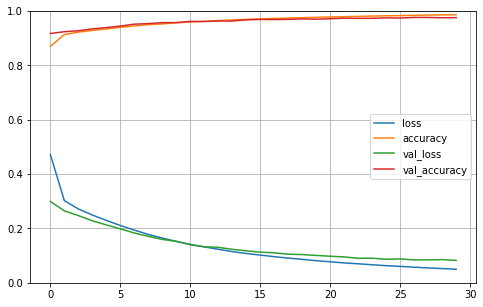

In [120]:
default_dense = partial(keras.layers.Dense,
                        kernel_initializer='lecun_normal',
                        activation='selu',
                       )

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    default_dense(300),
    default_dense(300),
    default_dense(10, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # loss when labels are integers
    optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9),
    metrics=['accuracy']
)

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb]
)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [121]:
model.evaluate(X_test, y_test);

313/313 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9742


### As is, the default configuration doesn't perform any better than the simple dense model.

# END